In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>")) # this increases width to full screen

In [2]:
import numpy as np # import numerical python
import matplotlib.pyplot as plt # import plotting functions
import seaborn as sns # import nicer plotting functions
import pandas as pd # import pandas to import data
import tifffile as tiff
from tifffile import imwrite, imread

In [3]:
from CommonFunctions import Gaussians, Mask_Gen, Image_Gen
Gau_gen = Gaussians.GaussFuncs()
IG = Image_Gen.ImageGenFuncs()
MG = Mask_Gen.MaskFuncs()

In [4]:
IG.gen_camera_images

<function CommonFunctions.Image_Gen.ImageGenFuncs.gen_camera_images(gain_value, wavelength, R, G, B, dyes, n_photons, laser_int, image_masks, background_photons=100)>

In [5]:
from Camera_QE import getpixelefficiency
gpe = getpixelefficiency.GPE()
R, G, B, wavelength = gpe.getpixelefficiency('Camera_QE/CS505CU_QE.csv')

In [6]:
image_masks, object_locs = MG.mask_generation()

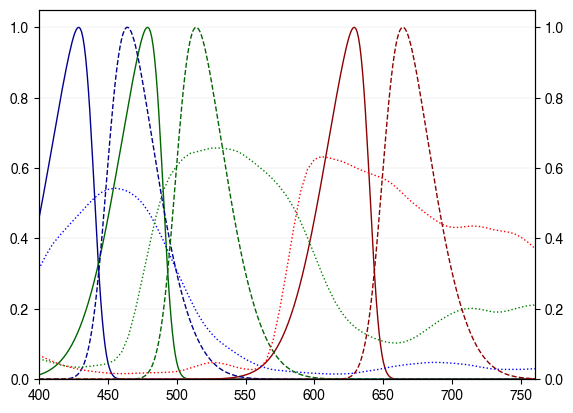

In [23]:
# let's make a few (arbitrary) dyes
# make some dyes at different colours
dye_width = 30 # 30 nm peak width
dye_abs_skew = -5 # absorption spectral skew
dye_em_skew = 3 # emission spectral skew
Abs_450 = Gau_gen.SkewGaussian_wavelength(dye_width, dye_abs_skew, 440, wavelength); Em_450 = Gau_gen.SkewGaussian_wavelength(dye_width, dye_em_skew, 450, wavelength)
Abs_500 = Gau_gen.SkewGaussian_wavelength(dye_width, dye_abs_skew, 490, wavelength); Em_500 = Gau_gen.SkewGaussian_wavelength(dye_width, dye_em_skew, 500, wavelength)
Abs_647 = Gau_gen.SkewGaussian_wavelength(dye_width, dye_abs_skew, 640, wavelength); Em_647 = Gau_gen.SkewGaussian_wavelength(dye_width, dye_em_skew, 650, wavelength)

#visualise them, and our pixel efficiencies
fig, ax = plt.subplots(1, 1)
ax2 = ax.twinx()
ax.plot(wavelength, Abs_450, lw=1, color='darkblue'); plt.plot(wavelength, Em_450, lw=1, color='darkblue', ls='--'); ax2.plot(wavelength, B, color='blue', lw=1, ls=':')
ax.plot(wavelength, Abs_500, lw=1, color='darkgreen'); plt.plot(wavelength, Em_500, lw=1, color='darkgreen', ls='--'); ax2.plot(wavelength, G, color='green', lw=1, ls=':')
ax.plot(wavelength, Abs_647, lw=1, color='darkred'); plt.plot(wavelength, Em_647, lw=1, color='darkred', ls='--'); ax2.plot(wavelength, R, color='red', lw=1, ls=':')

plt.xlim([400, 760])
ax2.set_ylim([0, 1.05])
ax.set_ylim([0, 1.05])
plt.grid(alpha=0.5, lw=0.25)
plt.show(block=False) # plot all the absorptions and emissions we have

In [24]:
# put dyes into array
dyes = np.dstack([[Abs_450, Em_450], [Abs_500, Em_500], [Abs_647, Em_647]])

# describe our laser wavelengths
lasers = np.array([420, 488, 640])

# describe our laser intensities
intensity_1 = np.array([0.1, 0.1, 1])
laser_sequence = np.vstack([lasers, intensity_1])

In [25]:
# get raw images, demosaiced images, and gain map
raw_images, R_image_demosaic, G_image_demosaic, B_image_demosaic, gain_map = IG.gen_camera_images(2, wavelength,
            R, G, B, dyes, np.array([1e6, 1e6, 1e6]), laser_sequence, image_masks, 100)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


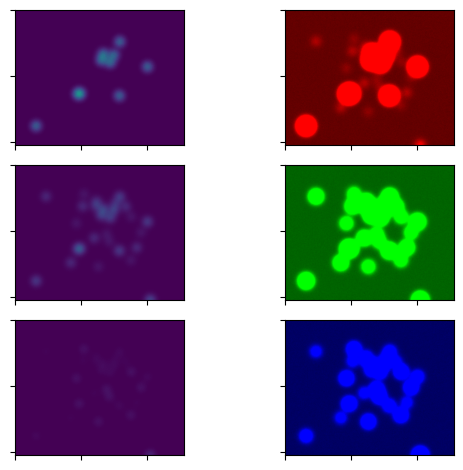

In [57]:
# why don't we plot all of these images
fig, ax = plt.subplots(3, 2)

ax[0, 0].imshow(raw_images[:, :, 0].T, vmin=50, vmax=6000) # let's plot the red channel
R_im_dem_toplot = np.dstack([R_image_demosaic[:, :, 0].T, R_image_demosaic[:, :, 1].T, R_image_demosaic[:, :, 2].T])
ax[0, 1].imshow(R_im_dem_toplot) # let's plot the red channel demosaiced


ax[1, 0].imshow(raw_images[:, :, 1].T, vmin=50, vmax=6000) # let's plot the red channel
G_im_dem_toplot = np.dstack([G_image_demosaic[:, :, 0].T, G_image_demosaic[:, :, 1].T, G_image_demosaic[:, :, 2].T])
ax[1, 1].imshow(G_im_dem_toplot) # let's plot the red channel demosaiced

ax[2, 0].imshow(raw_images[:, :, 2].T, vmin=50, vmax=6000) # let's plot the red channel
B_im_dem_toplot = np.dstack([B_image_demosaic[:, :, 0].T, B_image_demosaic[:, :, 1].T, B_image_demosaic[:, :, 2].T])
ax[2, 1].imshow(B_im_dem_toplot) # let's plot the red channel demosaiced

for i in np.arange(3):
    for j in np.arange(2):
        ax[i, j].set_xticklabels([]); ax[i, j].set_yticklabels([])
        
plt.tight_layout()
plt.show(block=False)